{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}
/home/data/cuhk03_release found :)
/home/data/Market-1501-v15.09.15 found :)
/home/data/DukeMTMC-reID found :)
found memmaped /home/data/cuhk03_release/labeled112x112.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap /home/data/DukeMTMC-reID/bounding_box_test112x112.npy
load memmap /home/data/DukeMTMC-reID/bounding_box_train112x112.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270


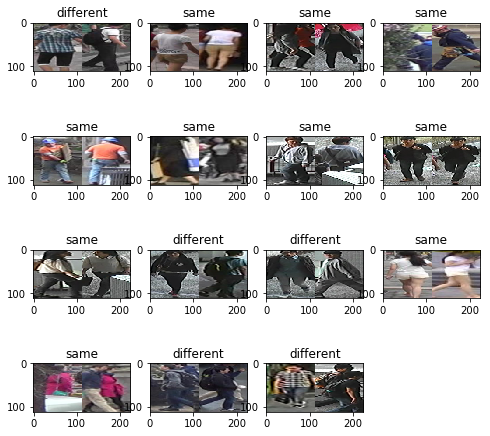

In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'../')
from pprint import pprint
import json
Settings = json.load(open('settings.txt'))
pprint(Settings)
import matplotlib.pyplot as plt
import numpy as np

root = Settings['data_root']

from cabbage.data import ReId

sampler = ReId.DataSampler(root, 112, 112)

X, Y = sampler.get_train_batch(10, 5)
x = X[0]

fig = plt.figure(figsize=(8,8))

for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(4,4,i+1)
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()

/home/data/cuhk03_release found :)
/home/data/Market-1501-v15.09.15 found :)
/home/data/DukeMTMC-reID found :)
found memmaped /home/data/cuhk03_release/labeled64x64.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap /home/data/DukeMTMC-reID/bounding_box_test64x64.npy
load memmap /home/data/DukeMTMC-reID/bounding_box_train64x64.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270


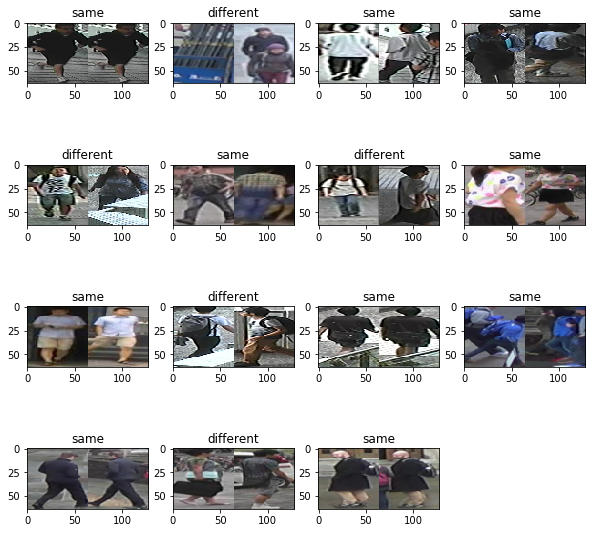

In [2]:
sampler = ReId.DataSampler(root, 64, 64)

X, Y = sampler.get_train_batch(10, 5)
x = X[0]

fig = plt.figure(figsize=(10,10))

for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(4,4,i+1)
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()

## MOT16 data

In [3]:
root = Settings['data_root']

from cabbage.data.MOT16Sampler import MOT16Sampler

mot16_sampler = MOT16Sampler(root, (64, 64))

finished generating X and Y for MOT16-02
load positive pairs from disk
pos pairs: (754629, 2)
MOT16-02 .. elapsed 0.016164302825927734
finished generating X and Y for MOT16-04
load positive pairs from disk
pos pairs: (3649988, 2)
MOT16-04 .. elapsed 0.04285931587219238
finished generating X and Y for MOT16-05
load positive pairs from disk
pos pairs: (51050, 2)
MOT16-05 .. elapsed 0.006495952606201172
finished generating X and Y for MOT16-09
load positive pairs from disk
pos pairs: (231718, 2)
MOT16-09 .. elapsed 0.02408456802368164
finished generating X and Y for MOT16-10
load positive pairs from disk
pos pairs: (1445910, 2)
MOT16-10 .. elapsed 0.06445693969726562
finished generating X and Y for MOT16-11
load positive pairs from disk
pos pairs: (844770, 2)
MOT16-11 .. elapsed 0.03571581840515137
finished generating X and Y for MOT16-13
load positive pairs from disk
pos pairs: (441830, 2)
MOT16-13 .. elapsed 0.03924727439880371


X (42, 64, 64, 6)
Y (42, 2)
42
(42, 64, 64, 6) (42, 2)
(3649988, 2)


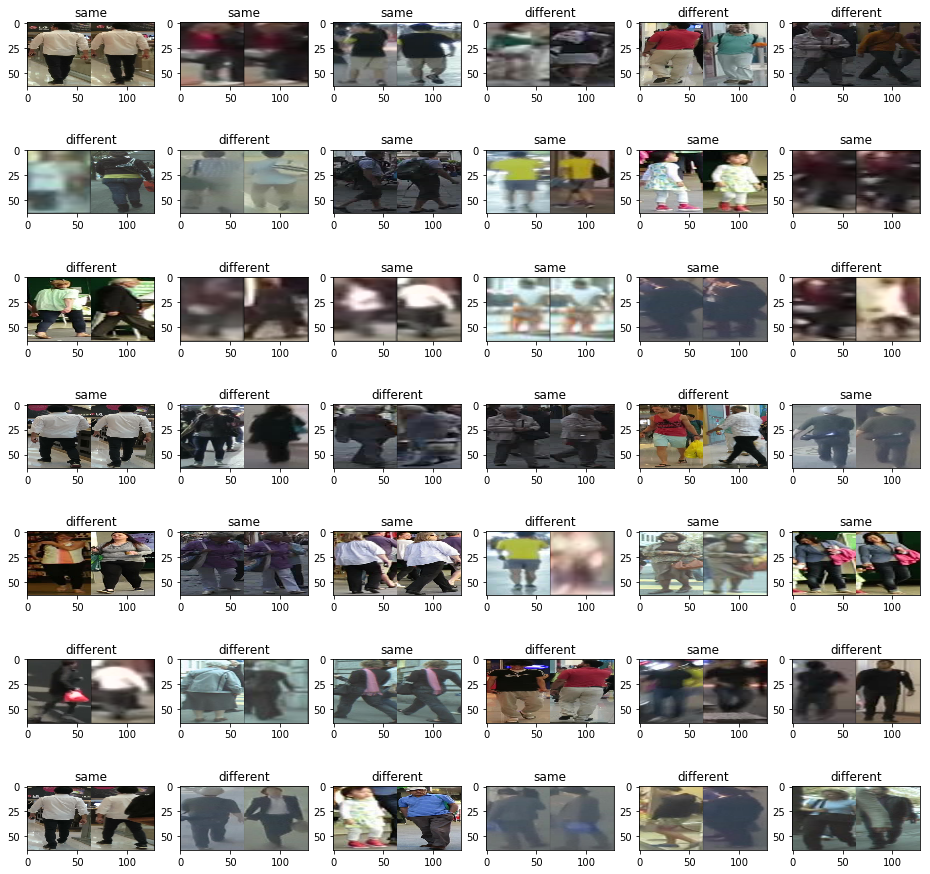

In [4]:
X, Y = mot16_sampler.get_all_batch(3, 3)
#X, Y = mot16_sampler.get_named_batch('MOT16-04', 10, 5)

print(X.shape, Y.shape)
print(mot16_sampler.pos_pairs['MOT16-04'].shape)

fig = plt.figure(figsize=(16,16))

for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(7,6,i+1)
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()